In [44]:
import pandas as pd
import sqlite3
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
pd.set_option('display.max_rows', None)

In [46]:
import seaborn as sns
sns.set(style="darkgrid")

In [47]:
conn = sqlite3.connect('astro_history.bd')
cursor = conn.cursor()
cursor.execute('select * from stats')
raw_data = cursor.fetchall()
names = list(map(lambda x: x[0], cursor.description))
conn.close()

In [48]:
data = pd.DataFrame(raw_data,columns=names)
data['time'] = pd.to_datetime(data['time'])
data['taken_at'] = pd.to_datetime(data['taken_at'])
data = data[data['time'] >= '2019-10-16 15:00:00']
#data = data[data['owner'] != 'elena_blinovskaya']
data.head()

,time,media_id,media_link,taken_at,like_count,owner,count_followers
10073,2019-10-16 15:30:00,2155313277114858278,https://instagram.com/p/B3pNgGWHTsm/,2019-10-15 18:29:00,3239,Astrolog_anisimova,241786
10074,2019-10-16 15:30:00,2154619840199686543,https://instagram.com/p/B3mv1Q5HHmP/,2019-10-14 19:32:00,4512,Astrolog_anisimova,241786
10075,2019-10-16 15:30:00,2153892468194422032,https://instagram.com/p/B3kKcm7Hi0Q/,2019-10-13 19:26:00,14764,Astrolog_anisimova,241786
10076,2019-10-16 15:30:00,2153181240132112869,https://instagram.com/p/B3hou4LHBHl/,2019-10-12 19:53:00,14788,Astrolog_anisimova,241786
10077,2019-10-16 15:30:00,2155313277114858278,https://instagram.com/p/B3pNgGWHTsm/,2019-10-15 18:29:00,3239,Astrolog_anisimova,241786


In [49]:
data.owner.unique()

array(['Astrolog_anisimova', 'Mylablife', 'Astrokoza', 'Chukreeva_zvezda',
       'Katrin.dia', 'Innashakti', 'Lubimova.astrolog',
       'Alexandrova_astro', 'elena_blinovskaya'], dtype=object)

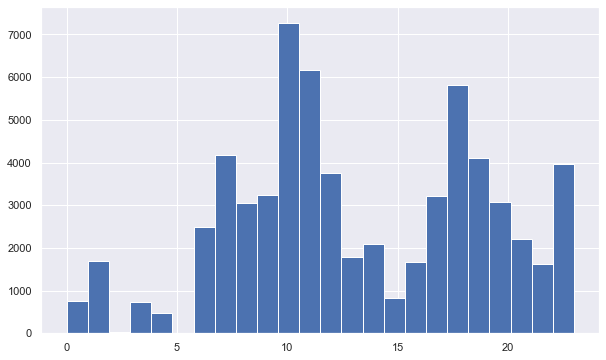

In [50]:
data['taken_at'].apply(lambda x: x.hour).hist(bins=24, figsize=(10,6))

Text(0, 0.5, 'Количество лайков')

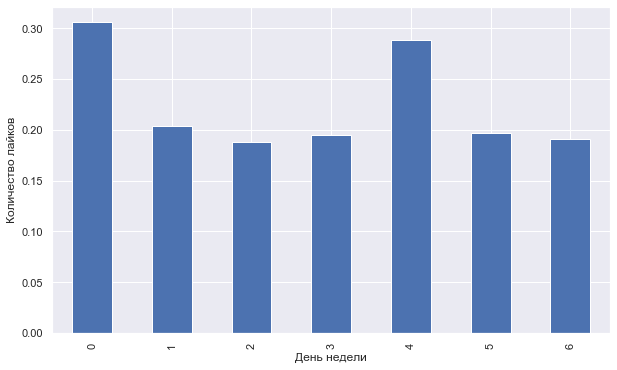

In [51]:
data_pivot = data.pivot_table('like_count','time','media_id')
data_pivot = data_pivot.resample('30min').mean()
data_pivot = data_pivot.apply(lambda x: x.interpolate('time'))

data_pivot = data_pivot.resample('D').sum()
#data_pivot = data_pivot.dropna(how='all')
data_pivot = data_pivot.iloc[1:-1]
data_pivot = data_pivot.diff()

data_pivot_norm=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_pivot))
data_pivot_norm.index = data_pivot.index
data_pivot_norm.columns = data_pivot.columns

figure(figsize=(10,6))
data_pivot_norm.groupby(data_pivot_norm.index.weekday).mean().mean(axis=1).plot.bar()
xlabel('День недели', fontsize=12)
ylabel('Количество лайков', fontsize=12)
#savefig('Часы и лайки.jpg',dpi=300)

Text(0, 0.5, 'Количество лайков')

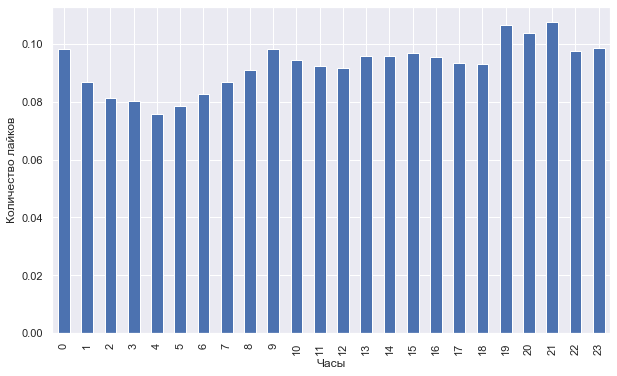

In [52]:
data_pivot = data.pivot_table('like_count','time','media_id')
data_pivot = data_pivot.resample('30min').mean()
data_pivot = data_pivot.apply(lambda x: x.interpolate('time'))

data_pivot = data_pivot.resample('H').sum()
#data_pivot = data_pivot.dropna(how='all')
data_pivot = data_pivot.iloc[1:-1]
data_pivot = data_pivot.diff()

data_pivot_norm=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_pivot))
data_pivot_norm.index = data_pivot.index
data_pivot_norm.columns = data_pivot.columns

figure(figsize=(10,6))
data_pivot_norm.groupby(data_pivot_norm.index.hour).mean().mean(axis=1).plot.bar()
xlabel('Часы', fontsize=12)
ylabel('Количество лайков', fontsize=12)
#savefig('Часы и лайки.jpg',dpi=300)

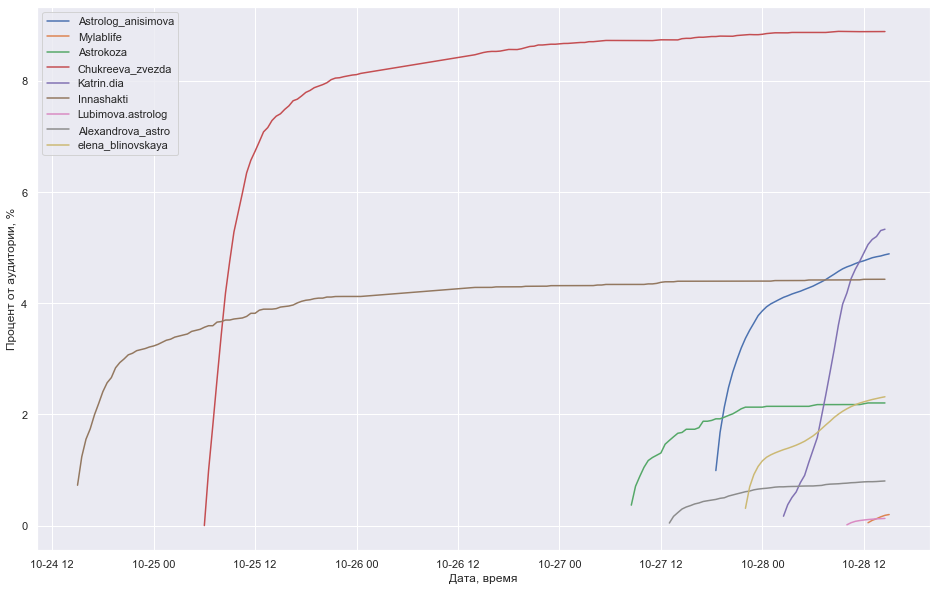

In [55]:
figure(figsize=(16,10))
for owner in data.owner.unique():
    data_owner = data.loc[data['owner'] == owner]
    new_post_id = data_owner.drop_duplicates('media_id').sort_values('taken_at', ascending=False).iloc[0]['media_id']
    x = data.loc[data['media_id'] == new_post_id, 'time']
    y = (data.loc[data['media_id'] == new_post_id, 'like_count'] / data.loc[data['media_id'] == new_post_id, 'count_followers'] * 100)
    #y = data.loc[data['media_id'] == new_post_id, 'like_count'].diff()
    
    plot(x, y, label=owner)
xlabel('Дата, время', fontsize=12)
ylabel('Процент от аудитории, %', fontsize=12)
legend(loc='upper left')
#savefig('История.jpg',dpi=300)

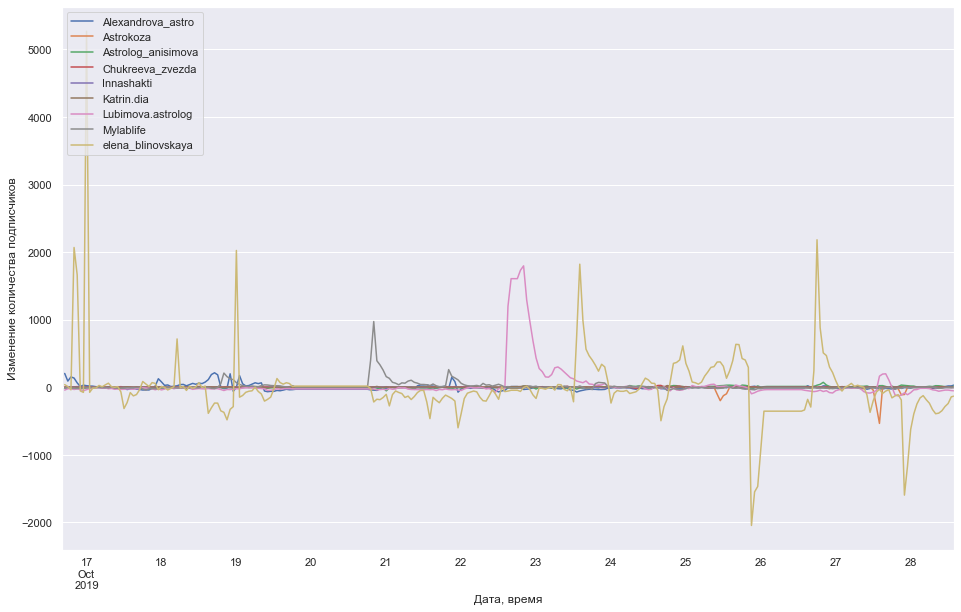

In [54]:
data_pivot_followers = data.pivot_table('count_followers','time','owner')
data_pivot_followers = data_pivot_followers.resample('30min').mean()
data_pivot_followers = data_pivot_followers.apply(lambda x: x.interpolate('time'))
data_pivot_followers = data_pivot_followers.resample('H').sum()
data_pivot_followers = data_pivot_followers.iloc[1:-1]
data_pivot_followers = data_pivot_followers.diff()
data_pivot_followers.plot(figsize=(16,10))
xlabel('Дата, время', fontsize=12)
ylabel('Изменение количества подписчиков', fontsize=12)
legend(loc='upper left')